<a href="https://colab.research.google.com/github/superbunny38/MachineLearning/blob/main/CS229MachineLearning/2022AndrewLectureNotes/Probset2/Prob5/Set2Problem5(b)(c).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import os

**Rights**

*Assignment Made by Andrew Ng*<br>
*Assignment Solved By Chaeeun Ryu*

# Utils

In [2]:
import csv

import matplotlib.pyplot as plt
import numpy as np
import json


def add_intercept_fn(x):
    """Add intercept to matrix x.

    Args:
        x: 2D NumPy array.

    Returns:
        New matrix same as x with 1's in the 0th column.
    """
    new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
    new_x[:, 0] = 1
    new_x[:, 1:] = x
    return new_x

def load_csv(csv_path, label_col='y', add_intercept=False):
    """Load dataset from a CSV file.

    Args:
         csv_path: Path to CSV file containing dataset.
         label_col: Name of column to use as labels (should be 'y' or 'l').
         add_intercept: Add an intercept entry to x-values.

    Returns:
        xs: Numpy array of x-values (inputs).
        ys: Numpy array of y-values (labels).
    """

    # Load headers
    with open(csv_path, 'r', newline='') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
    inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
    labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

    if inputs.ndim == 1:
        inputs = np.expand_dims(inputs, -1)

    if add_intercept:
        inputs = add_intercept_fn(inputs)

    return inputs, labels

def load_spam_dataset(tsv_path):
    """Load the spam dataset from a TSV file

    Args:
         csv_path: Path to TSV file containing dataset.

    Returns:
        messages: A list of string values containing the text of each message.
        labels: The binary labels (0 or 1) for each message. A 1 indicates spam.
    """

    messages = []
    labels = []

    with open(tsv_path, 'r', newline='', encoding='utf8') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')

        for label, message in reader:
            messages.append(message)
            labels.append(1 if label == 'spam' else 0)

    return messages, np.array(labels)

def plot(x, y, theta, save_path, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.

    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.savefig(save_path)


def plot_contour(predict_fn):
    """Plot a contour given the provided prediction function"""
    x, y = np.meshgrid(np.linspace(-10, 10, num=20), np.linspace(-10, 10, num=20))
    z = np.zeros(x.shape)

    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            z[i, j] = predict_fn([x[i, j], y[i, j]])

    plt.contourf(x, y, z, levels=[-float('inf'), 0, float('inf')], colors=['orange', 'cyan'])

def plot_points(x, y):
    """Plot some points where x are the coordinates and y is the label"""
    x_one = x[y == 0, :]
    x_two = x[y == 1, :]
    
    plt.scatter(x_one[:,0], x_one[:,1], marker='x', color='red')
    plt.scatter(x_two[:,0], x_two[:,1], marker='o', color='blue')

def write_json(filename, value):
    """Write the provided value as JSON to the given filename"""
    with open(filename, 'w') as f:
        json.dump(value, f)

In [3]:
!mkdir data

In [6]:
os.listdir('/content/data')

['ds5_test.csv', 'ds5_train.csv']

In [16]:
!mkdir output

# (b)
Implement your approach by completing the `initial_state`, `predict`, and `update_state` methods of `src/p05_percept.py`

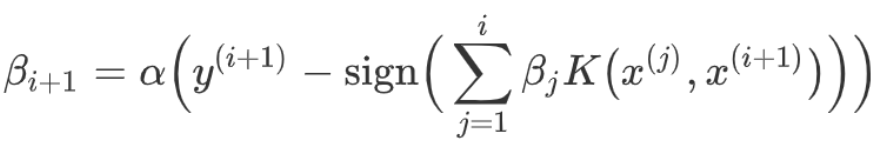

train perceptron w/ dot kernel
50th(/200) training sample
100th(/200) training sample
150th(/200) training sample
200th(/200) training sample


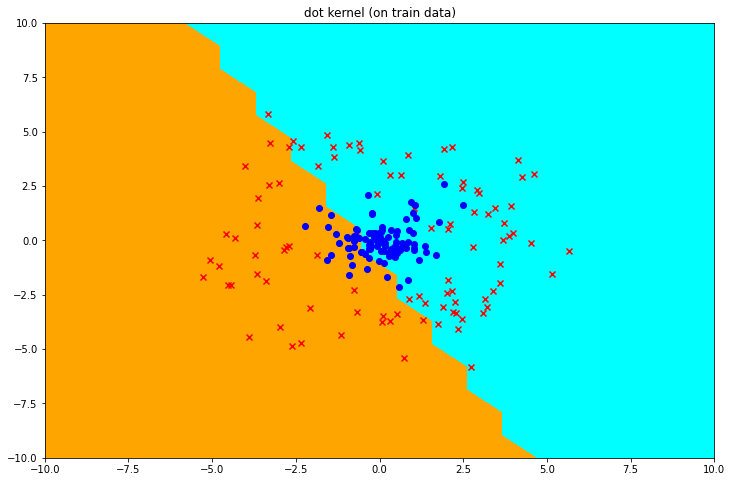

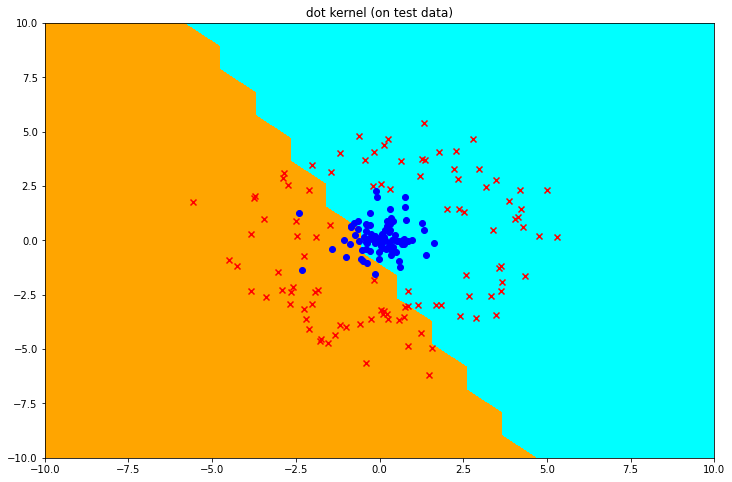

train perceptron w/ rbf kernel
50th(/200) training sample
100th(/200) training sample
150th(/200) training sample
200th(/200) training sample


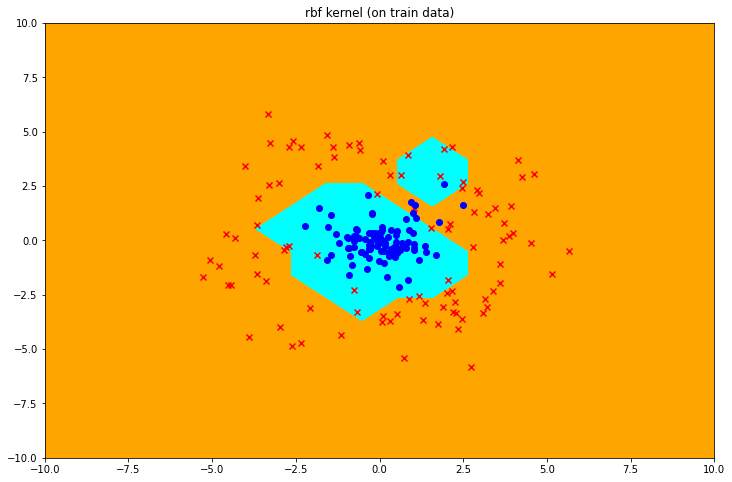

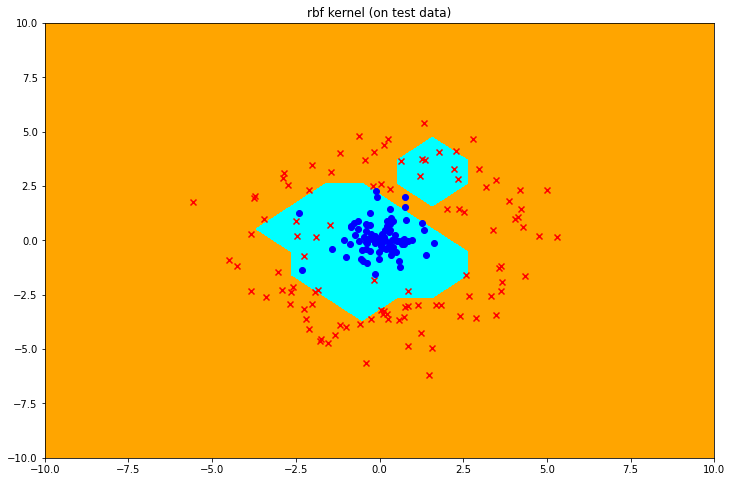

In [55]:
import math

import matplotlib.pyplot as plt
import numpy as np


def initial_state():#length of beta == m
    """Return the initial state for the perceptron.

    This function computes and then returns the initial state of the perceptron.
    Feel free to use any data type (dicts, lists, tuples, or custom classes) to
    contain the state of the perceptron.

    """
    
    # *** START CODE HERE ***
    return np.array([])
    # *** END CODE HERE ***


def predict(state, kernel, x_i):
    """Peform a prediction on a given instance x_i given the current state
    and the kernel.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns
            the result of a kernel
        x_i: A vector containing the features for a single instance
    
    Returns:
        Returns the prediction (i.e 0 or 1)
    """
    # *** START CODE HERE ***
    summ = 0
    train_x, train_y = load_csv('./data/ds5_train.csv')
    for idx, x_ in enumerate(train_x):
      summ += state[idx]*kernel(x_i,x_)
    return sign(summ)
    # *** END CODE HERE ***


def update_state(state, kernel, learning_rate, x_i, y_i,i):
    """Updates the state of the perceptron.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        learning_rate: The learning rate for the update
        x_i: A vector containing the features for a single instance
        y_i: A 0 or 1 indicating the label for a single instance
    """
    # *** START CODE HERE ***
    train_x, train_y = load_csv('./data/ds5_train.csv')
    summ_ = 0.
    if i == 1:
      b_next = learning_rate*(y_i-sign(0))
      state = np.append(state,b_next)
      return state
    for j in range(i-1):
      summ_ += state[j]*kernel(train_x[j],x_i)
    b_next = learning_rate*(y_i-sign(summ_))
    state = np.append(state, b_next)
    return state
    # *** END CODE HERE ***


def sign(a):
    """Gets the sign of a scalar input."""
    if a >= 0:
        return 1
    else:
        return 0


def dot_kernel(a, b):
    """An implementation of a dot product kernel.

    Args:
        a: A vector
        b: A vector
    """
    return np.dot(a, b)


def rbf_kernel(a, b, sigma=1):
    """An implementation of the radial basis function kernel.

    Args:
        a: A vector
        b: A vector
        sigma: The radius of the kernel
    """
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return math.exp(scaled_distance)


def train_perceptron(kernel_name, kernel, learning_rate):
    """Train a perceptron with the given kernel.

    This function trains a perceptron with a given kernel and then
    uses that perceptron to make predictions.
    The output predictions are saved to src/output/p05_{kernel_name}_predictions.txt.
    The output plots are saved to src/output_{kernel_name}_output.pdf.

    Args:
        kernel_name: The name of the kernel.
        kernel: The kernel function.
        learning_rate: The learning rate for training.
    """
    train_x, train_y = load_csv('./data/ds5_train.csv')

    state = initial_state()
    i = 0
    for x_i, y_i in zip(train_x, train_y):
        i+=1
        if i%50 == 0:
          print(f"{i}th(/{len(train_x)}) training sample")
        state = update_state(state, kernel, learning_rate, x_i, y_i,i)#update for every data sample
        # print(f"length of beta: {len(state)}, beta: {state}")
    assert len(state) == len(train_x)
    test_x, test_y = load_csv('./data/ds5_test.csv')

    plt.figure(figsize=(12, 8))
    plt.title(f"{kernel_name} kernel (on train data)")
    plot_contour(lambda a: predict(state, kernel, a))
    plot_points(train_x, train_y)
    plt.savefig('./output/p05_{}_output.pdf'.format(kernel_name))
    plt.show()
    plt.figure(figsize=(12, 8))
    plt.title(f"{kernel_name} kernel (on test data)")
    plot_contour(lambda a: predict(state, kernel, a))
    plot_points(test_x, test_y)
    # plt.savefig('./output/p05_{}_output.pdf'.format(kernel_name))
    plt.show()
    predict_y = [predict(state, kernel, test_x[i, :]) for i in range(test_y.shape[0])]

    # np.savetxt('./output/p05_{}_predictions'.format(kernel_name), predict_y)


def main():
    print("train perceptron w/ dot kernel")
    train_perceptron('dot', dot_kernel, 0.5)#using dot kernel w/ lr 0.5
    print("train perceptron w/ rbf kernel")
    train_perceptron('rbf', rbf_kernel, 0.5)#using rbf kernel w/ lr 0.5


if __name__ == "__main__":
    main()

# (c)
We provide two kernels, a dot product kernel and an radical basis function (rbf) kernel. One of the provided kernels performs extremely porrly in classifying the points. Which kernel performs badly and why does it fail?

**A**.

The dot product kernel performs badly.It is because, I assume the data is not linearly separable with the linear combination.